## Model Fitting and Evaluation

In [1]:
import numpy as np, pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.metrics import r2_score

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore',category=FutureWarning)

In [4]:
train = pd.read_csv('../datasets/train_cleaned.csv')


In [5]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,1,74.0,13517,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,1,TA,CBlock,2,2,2,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,1,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,4,4,Y,0,44,0,0,0,0,1,Na,Na,0,3,2010,WD,130500
1,60,1,43.0,11492,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,1,TA,PConc,3,2,2,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,1,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,4,4,Y,0,74,0,0,0,0,1,Na,Na,0,4,2009,WD,220000
2,20,1,68.0,7922,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,2,Gd,CBlock,2,2,2,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,2,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,4,4,Y,0,52,0,0,0,0,1,Na,Na,0,1,2010,WD,109000
3,60,1,73.0,9802,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,2,TA,PConc,3,2,2,Unf,0.0,Unf,0.0,384.0,384.0,GasA,3,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,4,4,Y,100,0,0,0,0,0,1,Na,Na,0,4,2010,WD,174000
4,50,1,82.0,14235,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,2,TA,PConc,4,3,2,Unf,0.0,Unf,0.0,676.0,676.0,GasA,2,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,4,4,N,0,59,0,0,0,0,1,Na,Na,0,3,2010,WD,138500


In [6]:
from pandas.api.types import is_object_dtype

def categorize_string_columns(df):
    for column in df:
        if(is_object_dtype(df[column])):
           df[column] = df[column].astype('category').cat.codes
    return df

In [8]:
train=categorize_string_columns(train)

In [9]:
test = pd.read_csv('../datasets/test_cleaned.csv')
test=categorize_string_columns(test)

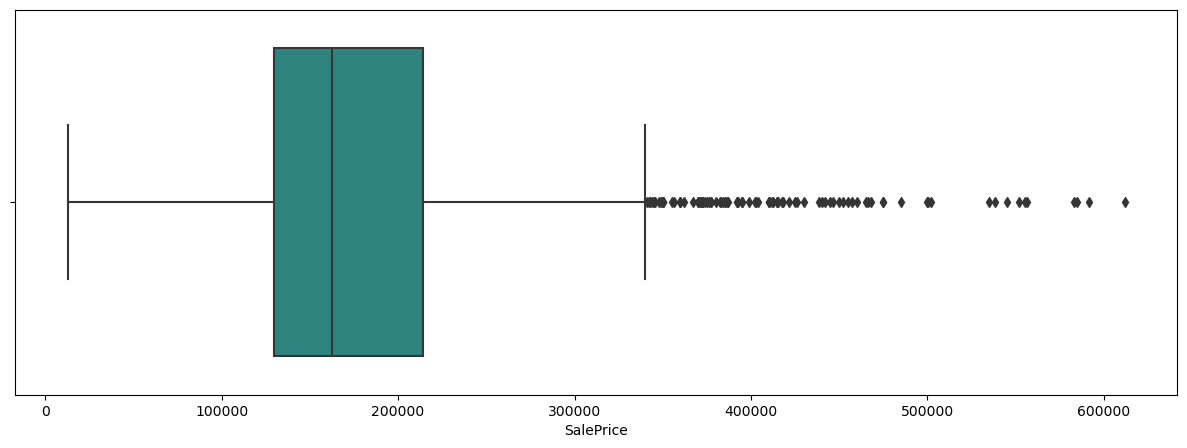

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.boxplot(x='SalePrice', data=train, palette='viridis')
plt.show()


In [58]:
#correlations = train.corr()
# cut_off = 0.5
# high_corrs = correlations[correlations.abs() > cut_off][correlations.abs() != 1].unstack().dropna().to_dict()
# high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
# high_corrs = high_corrs.reset_index()
# high_corrs = pd.DataFrame(high_corrs)
# high_corrs.columns = ['Attribute_1', 'Attribute_2','Correlations']
# high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep ='first')
# high_corrs = high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)

<Axes: >

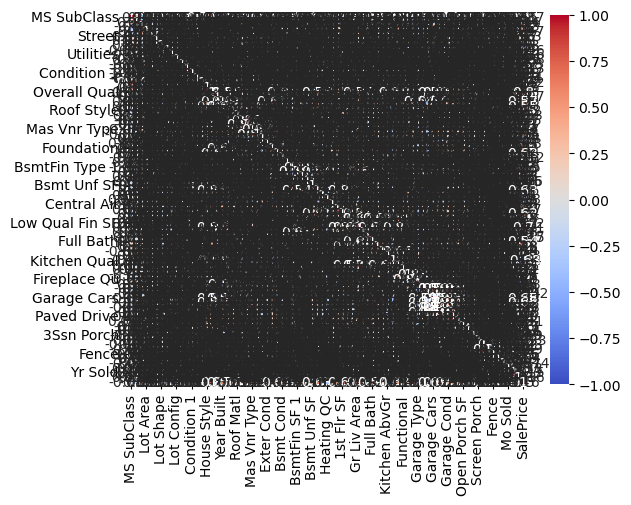

In [11]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

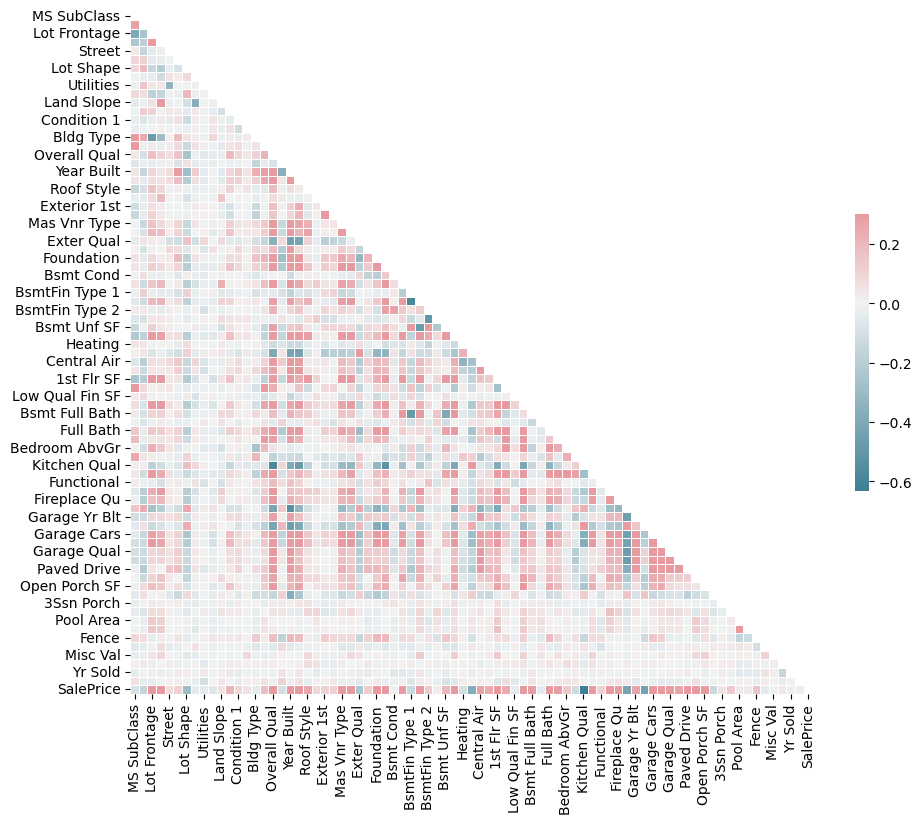

In [13]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Change np.bool to bool
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.4, cbar_kws={"shrink": .4})

In [14]:
train.corr().index[abs(train.corr()["SalePrice"])>0.5]

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Kitchen Qual', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area',
       'SalePrice'],
      dtype='object')

In [15]:
cont_features = ['Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Bsmt Qual','Year Built','Year Remod/Add','Fireplace Qu','Full Bath','TotRms AbvGrd','Mas Vnr Area']

/Users/rajashreechoudhary/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


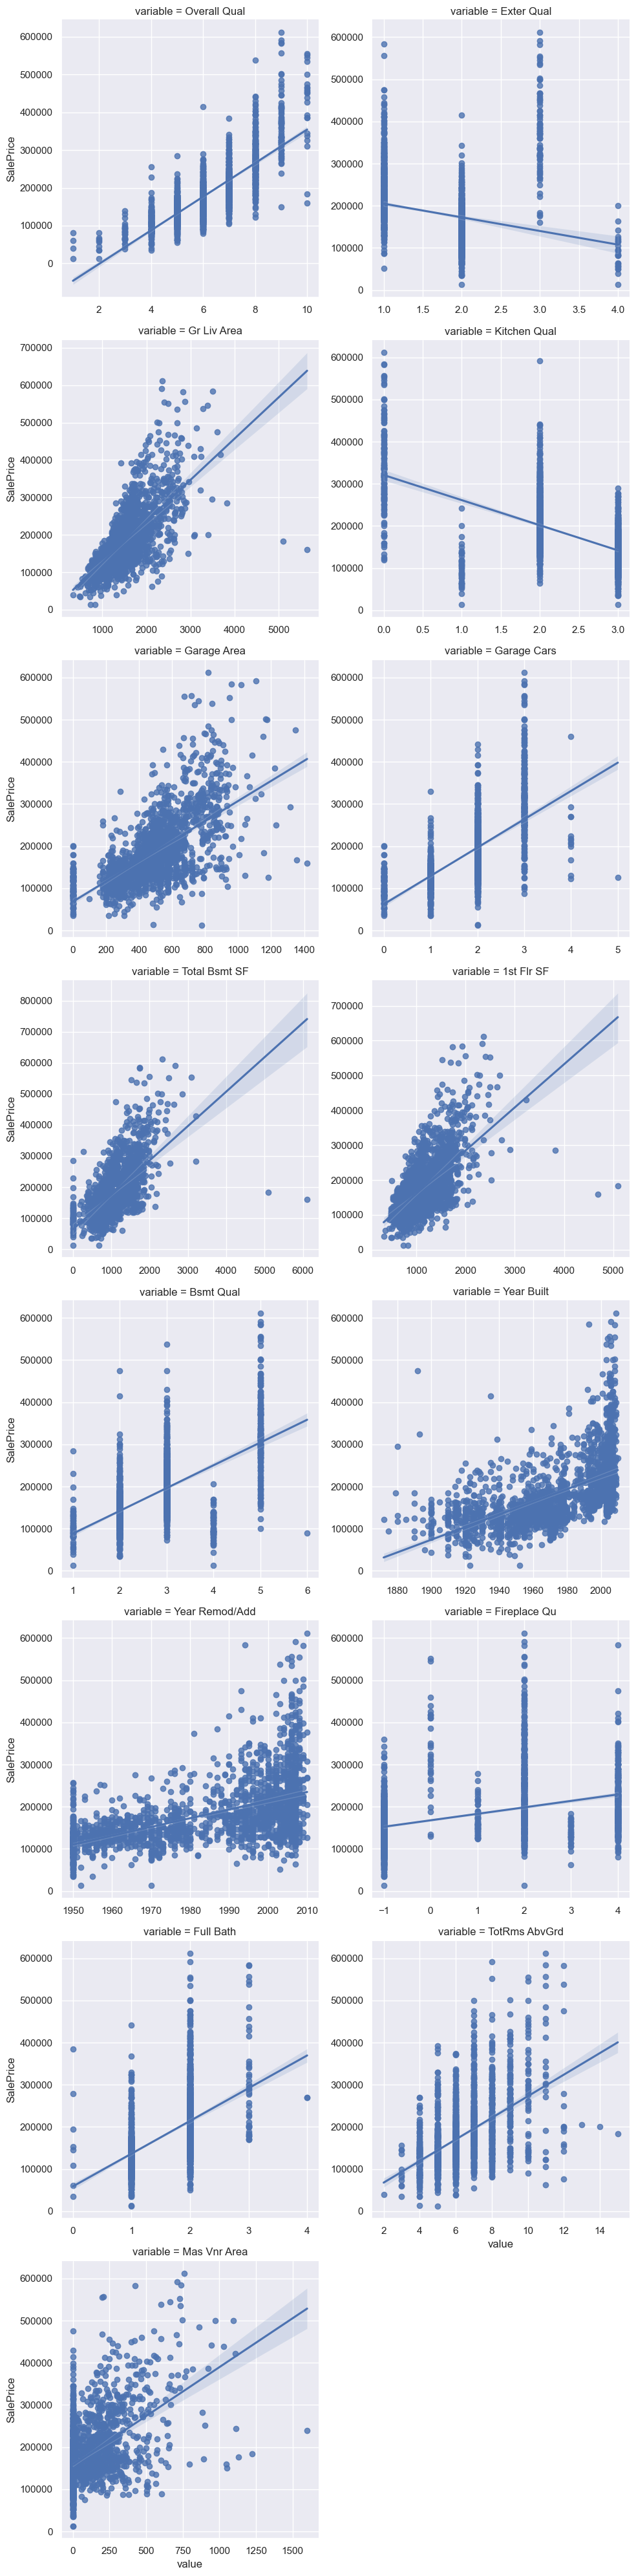

In [16]:
sns.set(font_scale=1)
f = pd.melt(train, id_vars = 'SalePrice', value_vars = cont_features)
g = sns.FacetGrid(f, col = "variable",  col_wrap=2, sharex=False, sharey=False, height=5)
s = g.map(sns.regplot, 'value', 'SalePrice');

In [31]:
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0)

In [32]:
# features = ['Year Built',
#        'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
#        'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
#        'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
#        'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
#        'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Central Air' ]
X = train.loc[:, train.columns != 'SalePrice']
y = train['SalePrice']

In [35]:
# split x and y variables into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
# fit a standard scaler to X_train and transform both X_train and X_test
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [37]:
#lasso
lasso = LassoCV()

In [38]:
# baseline R^2 score for the model
cross_val_score(lasso, X_train, y_train, cv=10)

array([0.90110447, 0.89253532, 0.90137511, 0.87246292, 0.87550133,
       0.78263191, 0.88389847, 0.88679045, 0.89586379, 0.45599395])

In [39]:
# fit lasso using training set
lasso.fit(X_train,y_train)
# training score
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
# testing score
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.88
Test set score: 0.78
Number of features used: 40


In [40]:
# feature extraction
rfe = RFE(lasso,n_features_to_select=25)
rfe_fit = rfe.fit(X_train,y_train)
# print("Num Features: %d" % rfe_fit.n_features_)
# print("Selected Features: %s" % rfe_fit.support_)
# print("Feature Ranking: %s" % rfe_fit.ranking_)
dfsupport = pd.DataFrame(rfe_fit.support_)
dfranking = pd.DataFrame(rfe_fit.ranking_)
dfcolumns = pd.DataFrame(X.columns)
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfsupport,dfranking],axis=1)
# naming the dataframe columns
featureScores.columns = ['Feature','Selection','Rank']

In [41]:
# isolate the top 25 features into a dataframe
top_25 = featureScores.loc[featureScores['Selection']==True]

In [42]:
# make the top 25 features into a list
best_feature = [i for i in top_25['Feature']]

In [43]:
X = train[best_feature]

In [44]:
# split X and y variables into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
# R^2 score for the model
cross_val_score(lasso, X_train, y_train, cv=10).mean()

0.7344468430592778

In [46]:
# fit lasso using training set
model_lasso = lasso.fit(X_train,y_train)
# training score
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
# testing score
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.79
Test set score: 0.63
Number of features used: 11


In [47]:
pred_lasso = lasso.predict(X_test)

In [48]:
#initiate Linear regression

lr = LinearRegression()

In [49]:
# R^2 score for the model
cross_val_score(lr, X_train, y_train, cv=10).mean()

0.8421024372769912

In [50]:
# fit linear using training set
model_lr = lr.fit(X_train,y_train)
# training score
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
# testing score
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Training set score: 0.89
Test set score: 0.77
Number of features used: 25


In [51]:
pred_lr = lr.predict(X_test)

In [52]:
ridge = RidgeCV()

In [53]:
# R^2 score for the model
cross_val_score(ridge, X_train, y_train, cv=10).mean()

0.8421141233845043

In [54]:
# fit ridge using training set
model_ridge = ridge.fit(X_train,y_train)
# training score
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
# testing score
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

Training set score: 0.89
Test set score: 0.77
Number of features used: 25


All 3 models return the the same result when 22 of the carefuly selected features are selected. The test score still performed slightly worse than the training score.

In [55]:
pred_ridge = ridge.predict(X_test)

In [70]:
X = ss.fit_transform(test[best_feature])

In [66]:
test.fillna(0, inplace = True)

In [60]:
test['Pool QC'] = test['Pool QC'].fillna(0)

In [69]:
best_feature

['MS SubClass',
 'Lot Area',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Mas Vnr Area',
 'Exter Qual',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Bedroom AbvGr',
 'Kitchen Qual',
 'Functional',
 'Fireplaces',
 'Garage Area',
 'Screen Porch',
 'Misc Val']

In [71]:
prediction = model_lasso.predict(X)

/Users/rajashreechoudhary/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


In [72]:
# for submission
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = prediction
submission.head()

,Id,SalePrice
0,2658,-1.140356e+06
1,2718,-1.139206e+06
2,2414,-1.138726e+06
3,1989,-1.139562e+06
4,625,-1.139527e+06


In [77]:
submission.to_csv('../Data_Submission/lasso_ridge.csv')